"""
Nooksack Temperature Lapse Rate
Created on Fri Sep 30 14:54:02 2016
@author: Claire Beveridge, University of Washington

This code analyzes temperature lapse rates for iButton sensors deployed in the 
 Nooksack River Basin:

ID	    Elevation (m) 	Data Type	     Date Start	Date End
Lapse2	664	        Air Temperature	12/4/2015	8/16/2016
Lapse3	664	        Air Temperature	12/4/2015	8/16/2016
Lapse4	1056	        Air Temperature	12/4/2015	8/16/2016
			        Ground Temperature	12/4/2015	8/16/2016
Lapse5	1287	        Air Temperature	12/28/2015	9/9/2016-- NOT INCLUDED
Lapse6	1575	        Air Temperature	12/4/2015	8/16/2016
			        Ground Temperature	12/4/2015	8/16/2016
Lapse7	1743	        Air Temperature	10/14/2015	8/16/2016
			        Ground Temperature	10/14/2015	8/16/2016
			        Relative Humidity	10/14/2015	8/16/2016

Important notes:
1. For all sensors, temperature or relative humidity data was collected every
3 hours.
2. Lapse 5 and Lapse 7 have data collected on slightly different dates. Only
the dates that overlap with the remaining sensors (i.e., in the range of 
12/4/2015-8/16/2016) are analyzed. Hence, Lapse 5 and Lapse 7 have adjusted 
data sets (indicated with "adj" in the variable name) that are used. 

Below is a description of the main variables used in this code:

Values for each sensor (Lapse2, Lapse3, Lapse4, Lapse4_ground, Lapse5, Lapse6, 
Lapse6_ground, Lapse7, Lapse7_ground, Lapse7_RH):
Shown for Lapse 2 and apply to all variables except Lapse7_RH. Special cases
noted below
    - ann_mean_daily_Tmean_Lapse2: Mean of daily temperature over year  
    - daily_Tmax_Lapse2: Array of daily maximum temperature (daily max of 3-hour data)
    - daily_Tmean_Lapse2: Array of daily mean temperature (average of 3-hour data)- See below for Lapse 5 and Lapse 7 adjusted varaible
    - daily_Tmin_Lapse2: Array of daily minimum temperature (daily min of 3-hour data)
    - date_Lapse2: date of original measurement
    - datetime_Lapse2: date and time of original measurement- See below for Lapse 5 and Lapse 7 adjusted varaible
    - elev_Lapse2: Elevation of sensor in [m]
    - end_date_Lapse2: End date of measurements for sensor
    - grouped_daily_data_Lapse2: Sub-daily measurments grouped by day
    - grouped_dates_Lapse2: array of days that measurements collected
    - ndays_Lapse2: Number of days that measurements collected
    - n_Lapse2: Number of original measurements for sensor (every 3 hours)
    - start_date_Lapse2: Start date of measurements for sensor
    - time_Lapse2: time of original measurement- See below for Lapse 5 and Lapse 7 adjusted varaible
    - temp_Lapse2: temperature of original measurement [deg C]- See below for Lapse 5 and Lapse 7 adjusted varaible

Special cases for individual variables:
- Lapse 5_ NOT INCLUDED IN THIS SCRIPT
    - ann_mean_daily_Tmean_Lapse5_adj: Mean of daily temperature over year, adjusted
    - daily_Tmean_Lapse5_adj: Adjusted array- Has "nan" for days that data not 
    collected at Lapse 5 but was collected at other sensors
    - datetime_Lapse5_adj: Adjusted array- Has "nan" for days that data not 
    collected at Lapse 5 but was collected at other sensors
    - grouped_dates_Lapse5_adj: Adjusted array- Has "nan" for days that data
    not collected at Lapse 5 but was collected at other sensors
    - ind_Lapse5_shift_daily: number of days to delay before first Lapse 5 data
     entry, as well as number of additional days that Lapse 5 extends beyond other
     sensors
    - ind_Lapse5_shift_subdaily: number of time steps to delay before first Lapse 5
     data entry, as well as number of additional days that Lapse 5 extends beyond 
     other sensors
     - temp_Lapse5_adj: Adjusted array- Has "nan" for days that data not 
     collected at Lapse 5 but was collected at other sensors
- Lapse 7 -Air Temperature
    - ann_mean_daily_Tmean_Lapse7_adj: Mean of daily temperature over year, adjusted
    - daily_Tmean_Lapse7_adj: Adjusted array- Has "nan" for days that data not 
    collected at Lapse 5 but was collected at other sensors
    - datetime_Lapse5_adj: Adjusted array- Has "nan" for days that data not 
    collected at Lapse 5 but was collected at other sensors
    - grouped_dates_Lapse5_adj: Adjusted array- Has "nan" for days that data 
    not collected at Lapse 5 but was collected at other sensors
    - ind_Lapse5_shift_daily: number of days to delay before first Lapse 5 data
     entry, as well as number of additional days that Lapse 5 extends beyond other
     sensors
    - ind_Lapse5_shift_subdaily: number of time steps to delay before first Lapse 5
     data entry, as well as number of additional days that Lapse 5 extends beyond 
     other sensors
     - temp_Lapse5_adj: Adjusted array- Has "nan" for days that data not 
     collected at Lapse 5 but was collected at other sensors
- Lapse 7:
    - daily_Tmean_Lapse7_adj: Adjusted array- starts same day as other sensors
    - datetime_Lapse7_adj: Adjusted array- starts same day as other sensors  
    - grouped_dates_Lapse7_adj: Adjusted array- starts same day as other sensors  
    - ind_Lapse7_start: Index to start Lapse 7 sub-daily data to align with other sensors
    - ind_Lapse7_daily_start: Index to start Lapse 7 daily average to align with other sensors
    - RH_Lapse7: RH of Lapse 7 
    - RH_thold: Array of 1 where RH> threshold value, 0 where RH< threshold value for 3-hour data
    - RH_thold_day: Array of 1 where RH> threshold value, 0 where RH< threshold value for daily data    
    - temp_Lapse7_adj: Adjusted array- starts same day as other sensors  

General variables:
    - ann_mean_LR_daily_Tmean: Annual mean- Daily temperature (mean) lapse rate
    - ann_mean_b_daily_Tmean: Annual mean- Daily temperature (mean) intercept
    - ann_daily_mean_LR_daily_Tmean: Annual mean- Daily temperature (mean) lapse rate
    - ann_daily_mean_LR_daily_Tmax: Annual mean- Daily temperature (max) lapse rate
    - ann_daily_mean_LR_daily_Tmin: Annual mean- Daily temperature (min) lapse rate
    - elevations: Elevations in [m] 
    - elevations_km: Elevations in [km] 
    - elevations_km_noLapse5:  Elevations in [km] excluding Lapse 5 (for calculating without Lapse 5 data)
    - grouped_month: Array of month that each measurement is colleced in
    - ind_dec, ind_jan, etc: indices of measurements collected in respective month  
    - LR_all_months: Array of each month lapse rate assuming constant w/elevation
    - LR_23_4_all_months, etc. : Array of each month lapse rate between Lapse 2/3 and 4, etc.
    - mean_LR: Mean lapse rate for 3-hour measurements
    - mean_b: Mean intercept for 3-hour measurements 
    - mean_r: mean correlation coefficient for 3-hour measurements 
    - mean_p: mean p-value for 3-hour measurements 
    - mean_SE: standard error for 3-hour measurements
    - mean_LR_4_5, etc.: Mean lapse rate for 3-hour measurements between Lapse 4 and Lapse 5
    - mean_b_LR_4_5, etc.: Mean intercept for 3-hour measurements between Lapse 4 and Lapse 5 
    - mean_r_LR_4_5, etc.: Mean correlation coefficient for 3-hour measurements  between Lapse 4 and Lapse 5
    - mean_p_LR_4_5, etc.: Mean p-value for 3-hour measurements  between Lapse 4 and Lapse 5
    - mean_SE_LR_4_5, etc.: Mean standard error for 3-hour measurements 
    - subdaily_b: Array of intercepts of 3-hour measurements   
    - subdaily_LR: Array of lapse rates of 3-hour measurements
    - subdaily_r: Array of correlation coefficient of 3-hour measurements
    - subdaily_p: Array of p-value of 3-hour measurements
    - subdaily_se: Array of standard error of 3-hour measurements
    - subdaily_b_4_5, etc.: Array of intercepts of 3-hour measurements between Lapse 4 and Lapse 5  
    - subdaily_LR_4_5, etc.: Array of lapse rates of 3-hour measurements between Lapse 4 and Lapse 5
    - subdaily_r_4_5, etc.: Array of correlation coefficient of 3-hour measurements between Lapse 4 and Lapse 5
    - subdaily_p_4_5, etc.: Array of p-value of 3-hour measurements between Lapse 4 and Lapse 5
    - subdaily_se_4_5, etc.: Array of standard error of 3-hour measurements between Lapse 4 and Lapse 5
"""

In [1]:
# Import modules, data, variables
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
# import pandas
# import itertools as it
# import hs_utils
# establish a secure connection to HydroShare
# hs = hs_utils.hydroshare()


### Import elevation for each Lapse Rate sensor as a floating point number

In [2]:
path_data = '/Users/carina/Desktop/data/Nooksack/'
Elevation= np.genfromtxt(path_data + 'Elevation.csv', delimiter=',',skip_header=1)
elev_Lapse2=np.array((Elevation[0][1]), dtype='float64')
elev_Lapse3=np.array((Elevation[1][1]), dtype='float64')
elev_Lapse4=np.array((Elevation[2][1]), dtype='float64')
elev_Lapse5=np.array((Elevation[3][1]), dtype='float64')
elev_Lapse6=np.array((Elevation[4][1]), dtype='float64')
elev_Lapse7=np.array((Elevation[5][1]), dtype='float64')
elev_Lapse1=np.array((Elevation[6][1]), dtype='float64')

### Import temperature data from csv files

In [3]:
path_2017 = '/Users/carina/Desktop/data/Nooksack/2017/'
Lapse1= np.genfromtxt(path_2017 + 'Lapse1_9-28-17_T3hr.csv', delimiter=',',autostrip=True,skip_header=21,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse1=len(Lapse1) # n is number of samples in the record
datetime_Lapse1=np.empty(n_Lapse1,dtype=object)
date_Lapse1=np.empty(n_Lapse1,dtype=object)
time_Lapse1=np.empty(n_Lapse1,dtype=object)
temp_Lapse1=np.empty(n_Lapse1,dtype='float64')
for x in range(0,n_Lapse1): # Cycle through all days in sequence
    date_Lapse1[x]=datetime.date(Lapse1[x][0])
    time_Lapse1[x]=datetime.time(Lapse1[x][0])
    datetime_Lapse1[x]=Lapse1[x][0]
    temp_Lapse1[x]=Lapse1[x][2]
del(Lapse1)


In [4]:
Lapse4= np.genfromtxt(path_2017 + 'Lapse4_9-28-17_T3hr.csv', delimiter=',',autostrip=True,skip_header=16,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse4=len(Lapse4) # n is number of samples in the record
datetime_Lapse4=np.empty(n_Lapse4,dtype=object)
date_Lapse4=np.empty(n_Lapse4,dtype=object)
time_Lapse4=np.empty(n_Lapse4,dtype=object)
temp_Lapse4=np.empty(n_Lapse4,dtype='float64')
for x in range(0,n_Lapse4): # Cycle through all days in sequence
    date_Lapse4[x]=datetime.date(Lapse4[x][0])
    time_Lapse4[x]=datetime.time(Lapse4[x][0])
    datetime_Lapse4[x]=Lapse4[x][0]
    temp_Lapse4[x]=Lapse4[x][2]
del(Lapse4)    

In [5]:
Lapse5= np.genfromtxt(path_2017 + 'Lapse5_9-28-17_T3hr.csv', delimiter=',',autostrip=True,skip_header=21,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse5=len(Lapse5) # n is number of samples in the record
datetime_Lapse5=np.empty(n_Lapse5,dtype=object)
date_Lapse5=np.empty(n_Lapse5,dtype=object)
time_Lapse5=np.empty(n_Lapse5,dtype=object)
temp_Lapse5=np.empty(n_Lapse5,dtype='float64')
for x in range(0,n_Lapse5): # Cycle through all days in sequence
    date_Lapse5[x]=datetime.date(Lapse5[x][0])
    time_Lapse5[x]=datetime.time(Lapse5[x][0])
    datetime_Lapse5[x]=Lapse5[x][0]
    temp_Lapse5[x]=Lapse5[x][2]
del(Lapse5)    
    

In [74]:
Lapse6= np.genfromtxt(path_2017 + 'Lapse6_9-27-17_T4hr.csv', delimiter=',',autostrip=True,skip_header=16,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse6=len(Lapse6) # n is number of samples in the record
date_Lapse6=np.empty(n_Lapse6,dtype=object)
time_Lapse6=np.empty(n_Lapse6,dtype=object)
datetime_Lapse6=np.empty(n_Lapse6,dtype=object)
temp_Lapse6=np.empty(n_Lapse6,dtype='float64')
for x in range(0,n_Lapse6): # Cycle through all days in sequence
    datetime_Lapse6[x]=Lapse6[x][0]
    date_Lapse6[x]=datetime.date(Lapse6[x][0])
    time_Lapse6[x]=datetime.time(Lapse6[x][0])
    temp_Lapse6[x]=Lapse6[x][2]
del(Lapse6)

   
Lapse7= np.genfromtxt(path_2017 + 'Lapse7_9-27-17_T3hr.csv', delimiter=',',autostrip=True,skip_header=21,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse7=len(Lapse7) # n is number of samples in the record
date_Lapse7=np.empty(n_Lapse7,dtype=object)
time_Lapse7=np.empty(n_Lapse7,dtype=object)
datetime_Lapse7=np.empty(n_Lapse7,dtype=object)
temp_Lapse7=np.empty(n_Lapse7,dtype='float64')
for x in range(0,n_Lapse7): # Cycle through all days in sequence
    datetime_Lapse7[x]=Lapse7[x][0]
    date_Lapse7[x]=datetime.date(Lapse7[x][0])
    time_Lapse7[x]=datetime.time(Lapse7[x][0])
    temp_Lapse7[x]=Lapse7[x][2]
del(Lapse7)
    



In [75]:
Lapse1_RH=np.genfromtxt(path_2017 + 'Lapse1_9-28-17_RH.csv', delimiter=',',autostrip=True,skip_header=20,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%Y %H:%M")})
n_Lapse1_RH=len(Lapse1_RH) # n is number of samples in the record
date_Lapse1_RH=np.empty(n_Lapse1_RH,dtype=object)
time_Lapse1_RH=np.empty(n_Lapse1_RH,dtype=object)
datetime_Lapse1_RH=np.empty(n_Lapse1_RH,dtype=object)
RH_Lapse1=np.empty(n_Lapse1_RH,dtype='float64')
for x in range(0,n_Lapse1_RH): # Cycle through all days in sequence
    datetime_Lapse1_RH[x]=Lapse1_RH[x][0]
    date_Lapse1_RH[x]=datetime.date(Lapse1_RH[x][0])
    time_Lapse1_RH[x]=datetime.time(Lapse1_RH[x][0])
    RH_Lapse1[x]=Lapse1_RH[x][2]
del(Lapse1_RH)     

Lapse5_RH=np.genfromtxt(path_2017 + 'Lapse5_9-28-17_RH.csv', delimiter=',',autostrip=True,skip_header=20,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%Y %H:%M")})
n_Lapse5_RH=len(Lapse5_RH) # n is number of samples in the record
date_Lapse5_RH=np.empty(n_Lapse5_RH,dtype=object)
time_Lapse5_RH=np.empty(n_Lapse5_RH,dtype=object)
datetime_Lapse5_RH=np.empty(n_Lapse5_RH,dtype=object)
RH_Lapse5=np.empty(n_Lapse5_RH,dtype='float64')
for x in range(0,n_Lapse5_RH): # Cycle through all days in sequence
    datetime_Lapse5_RH[x]=Lapse5_RH[x][0]
    date_Lapse5_RH[x]=datetime.date(Lapse5_RH[x][0])
    time_Lapse5_RH[x]=datetime.time(Lapse5_RH[x][0])
    RH_Lapse5[x]=Lapse5_RH[x][2]
del(Lapse5_RH)  

Lapse7_RH=np.genfromtxt(path_2017 + 'Lapse7_9-27-17_rh.csv', delimiter=',',autostrip=True,skip_header=20,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%Y %H:%M")})
n_Lapse7_RH=len(Lapse7_RH) # n is number of samples in the record
date_Lapse7_RH=np.empty(n_Lapse7_RH,dtype=object)
time_Lapse7_RH=np.empty(n_Lapse7_RH,dtype=object)
datetime_Lapse7_RH=np.empty(n_Lapse7_RH,dtype=object)
RH_Lapse7=np.empty(n_Lapse7_RH,dtype='float64')
for x in range(0,n_Lapse7_RH): # Cycle through all days in sequence
    datetime_Lapse7_RH[x]=Lapse7_RH[x][0]
    date_Lapse7_RH[x]=datetime.date(Lapse7_RH[x][0])
    time_Lapse7_RH[x]=datetime.time(Lapse7_RH[x][0])
    RH_Lapse7[x]=Lapse7_RH[x][2]
del(Lapse7_RH) 

# Plot sub-hourly data
### Create a figure, specifiying figure size

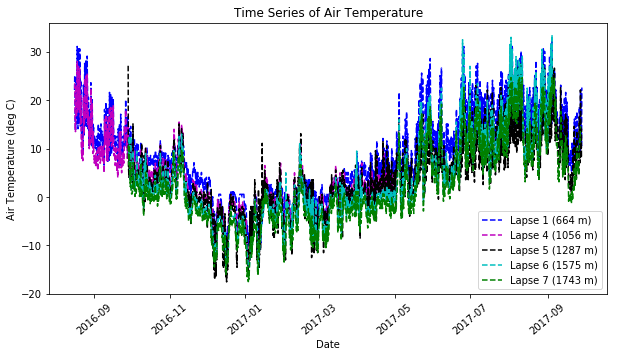

In [76]:
fig1, ax1=plt.subplots(1,1,figsize=(10, 5))
# Plot data and specify label of each line (for legend)
plt.plot(datetime_Lapse1,temp_Lapse1,'b--',label='Lapse 1 (664 m)')
#plt.plot(datetime_Lapse3,temp_Lapse3,'r--',label='Lapse 3 (664 m)')
plt.plot(datetime_Lapse4,temp_Lapse4,'m--',label='Lapse 4 (1056 m)')
plt.plot(datetime_Lapse5,temp_Lapse5,'k--',label='Lapse 5 (1287 m)')
plt.plot(datetime_Lapse6,temp_Lapse6,'c--',label='Lapse 6 (1575 m)')
plt.plot(datetime_Lapse7,temp_Lapse7,'g--',label='Lapse 7 (1743 m)')
# Set axes and figure titles
plt.title('Time Series of Air Temperature')
plt.xlabel('Date')
plt.xticks(rotation=40) # Rotate axis tick values as necessary
plt.ylabel('Air Temperature (deg C)')
# display a legend and specify the location (either 'best' or a value 1-10)
plt.legend(loc='best')

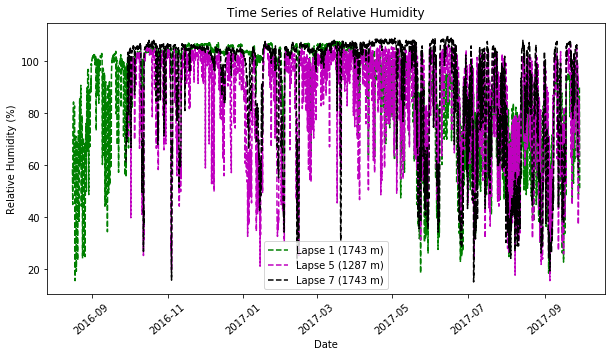

In [77]:
fig3, ax3=plt.subplots(1,1,figsize=(10, 5))
plt.plot(datetime_Lapse1_RH,RH_Lapse1,'g--',label='Lapse 1 (1743 m)')
plt.plot(datetime_Lapse5_RH,RH_Lapse5,'m--',label='Lapse 5 (1287 m)')
plt.plot(datetime_Lapse7_RH,RH_Lapse7,'k--',label='Lapse 7 (1743 m)')
plt.title('Time Series of Relative Humidity')
plt.xlabel('Date')
plt.xticks(rotation=40)
plt.ylabel('Relative Humidity (%)')
plt.legend(loc='best')


In [78]:
print('Beginning Lapse 1', datetime_Lapse1[0])
print('Beginning Lapse 4', datetime_Lapse4[0])
print('Beginning Lapse 5', datetime_Lapse5[0])
print('Beginning Lapse 6', datetime_Lapse6[0])
print('Beginning Lapse 7', datetime_Lapse7[0])

print('End Lapse 1', datetime_Lapse1[-1])
print('End Lapse 4', datetime_Lapse4[-1])
print('End Lapse 5', datetime_Lapse5[-1])
print('End Lapse 6', datetime_Lapse6[-1])
print('End Lapse 6', datetime_Lapse7[-1])


Beginning Lapse 1 2016-08-16 12:00:01
Beginning Lapse 4 2016-08-16 15:02:00
Beginning Lapse 5 2016-09-28 15:00:01
Beginning Lapse 6 2016-09-28 20:00:00
Beginning Lapse 7 2016-09-28 18:01:01
End Lapse 1 2017-09-28 15:00:01
End Lapse 4 2017-04-29 12:02:00
End Lapse 5 2017-09-28 09:00:01
End Lapse 6 2017-09-04 20:00:00
End Lapse 6 2017-09-27 12:01:01


### Group daily temperatures (daily mean, min, max) for computation of daily means

In [79]:
start_date_Lapse1 = date_Lapse1[0]
end_date_Lapse1 = date_Lapse1[-1]
ndays_Lapse1=(end_date_Lapse1-start_date_Lapse1).days+1
grouped_dates_Lapse1 = np.empty(ndays_Lapse1, dtype=object)
grouped_daily_data_Lapse1 = np.empty(ndays_Lapse1, dtype=object)
daily_Tmean_Lapse1 = np.empty(ndays_Lapse1, dtype=object)
daily_Tmax_Lapse1 = np.empty(ndays_Lapse1, dtype=object)
daily_Tmin_Lapse1 = np.empty(ndays_Lapse1, dtype=object)
ind_grouped_dates = 0 # starting index for grouping dates
ind_grouped_daily_data = 0 # starting index for grouping daily data
date=start_date_Lapse1 # starting date for grouping daily data
for j in range(0,ndays_Lapse1):
    temp_ind=np.where(date_Lapse1==date) # temporary indices of all measurements collected the same day
    grouped_dates_Lapse1[ind_grouped_dates]=date # Enter current day into grouped_dates_Lapse2 array
    grouped_daily_data_Lapse1[ind_grouped_daily_data]=[temp_Lapse1[temp_ind]]
    # Enter temperatures on the same day into grouped_daily_data_Lapse2
    daily_Tmean_Lapse1[ind_grouped_dates] = np.nanmean(temp_Lapse1[temp_ind])
    # Compute mean of daily temperatures and enter into daily mean array
    daily_Tmax_Lapse1[ind_grouped_dates] = np.nanmax(temp_Lapse1[temp_ind])
    # Compute max of daily temperatures and enter into daily max array
    daily_Tmin_Lapse1[ind_grouped_dates] = np.nanmin(temp_Lapse1[temp_ind])
    # Compute min of daily temperatures and enter into daily min array
    if j<ndays_Lapse1-1: # Makes the loop stop the day before the last day, so don't go out of bounds
        date=date_Lapse1[temp_ind[0][-1]+1]# go to first index of the next day (one day after the last index of previous data)
        ind_grouped_dates = ind_grouped_dates+1 # go to next index of array/next day
        ind_grouped_daily_data = ind_grouped_daily_data+1 # go to next index of array/next day

In [80]:
start_date_Lapse4 = date_Lapse4[0]
end_date_Lapse4 = date_Lapse4[-1]
ndays_Lapse4=(end_date_Lapse4-start_date_Lapse4).days+1
grouped_dates_Lapse4 = np.empty(ndays_Lapse4, dtype=object)
grouped_daily_data_Lapse4 = np.empty(ndays_Lapse4, dtype=object)
daily_Tmean_Lapse4 = np.empty(ndays_Lapse4, dtype=object)
daily_Tmax_Lapse4 = np.empty(ndays_Lapse4, dtype=object)
daily_Tmin_Lapse4 = np.empty(ndays_Lapse4, dtype=object)
ind_grouped_dates = 0
ind_grouped_daily_data = 0

date=start_date_Lapse4

for j in range(0,ndays_Lapse4):
    temp_ind=np.where(date_Lapse4==date)
    grouped_dates_Lapse4[ind_grouped_dates]=date
    grouped_daily_data_Lapse4[ind_grouped_daily_data]=[temp_Lapse4[temp_ind]]
    daily_Tmean_Lapse4[ind_grouped_dates] = np.nanmean(temp_Lapse4[temp_ind])
    daily_Tmax_Lapse4[ind_grouped_dates] = np.nanmax(temp_Lapse4[temp_ind])
    daily_Tmin_Lapse4[ind_grouped_dates] = np.nanmin(temp_Lapse4[temp_ind])
    if j<ndays_Lapse4-1:
        date=date_Lapse4[temp_ind[0][-1]+1]
        ind_grouped_dates = ind_grouped_dates+1
        ind_grouped_daily_data = ind_grouped_daily_data+1

start_date_Lapse5 = date_Lapse5[0]

end_date_Lapse5 = date_Lapse5[-1]
ndays_Lapse5=(end_date_Lapse5-start_date_Lapse5).days+1
grouped_dates_Lapse5 = np.empty(ndays_Lapse5, dtype=object)
grouped_daily_data_Lapse5 = np.empty(ndays_Lapse5, dtype=object)
daily_Tmean_Lapse5 = np.empty(ndays_Lapse5, dtype=object)
daily_Tmax_Lapse5 = np.empty(ndays_Lapse5, dtype=object)
daily_Tmin_Lapse5 = np.empty(ndays_Lapse5, dtype=object)
ind_grouped_dates = 0
ind_grouped_daily_data = 0

date=start_date_Lapse5

for j in range(0,ndays_Lapse5):
    temp_ind=np.where(date_Lapse5==date)
    grouped_dates_Lapse5[ind_grouped_dates]=date
    grouped_daily_data_Lapse5[ind_grouped_daily_data]=[temp_Lapse5[temp_ind]]
    daily_Tmean_Lapse5[ind_grouped_dates] = np.nanmean(temp_Lapse5[temp_ind])
    daily_Tmax_Lapse5[ind_grouped_dates] = np.nanmax(temp_Lapse5[temp_ind])
    daily_Tmin_Lapse5[ind_grouped_dates] = np.nanmin(temp_Lapse5[temp_ind])
    if j<ndays_Lapse5-1:
        date=date_Lapse5[temp_ind[0][-1]+1]
        ind_grouped_dates = ind_grouped_dates+1
        ind_grouped_daily_data = ind_grouped_daily_data+1        

start_date_Lapse6 = date_Lapse6[0]

end_date_Lapse6 = date_Lapse6[-1]
ndays_Lapse6=(end_date_Lapse6-start_date_Lapse6).days+1
grouped_dates_Lapse6 = np.empty(ndays_Lapse6, dtype=object)
grouped_daily_data_Lapse6 = np.empty(ndays_Lapse6, dtype=object)
daily_Tmean_Lapse6 = np.empty(ndays_Lapse6, dtype=object)
daily_Tmax_Lapse6 = np.empty(ndays_Lapse6, dtype=object)
daily_Tmin_Lapse6 = np.empty(ndays_Lapse6, dtype=object)
ind_grouped_dates = 0
ind_grouped_daily_data = 0

date=start_date_Lapse6

for j in range(0,ndays_Lapse6):
    temp_ind=np.where(date_Lapse6==date)
    grouped_dates_Lapse6[ind_grouped_dates]=date
    grouped_daily_data_Lapse6[ind_grouped_daily_data]=[temp_Lapse6[temp_ind]]
    daily_Tmean_Lapse6[ind_grouped_dates] = np.nanmean(temp_Lapse6[temp_ind])
    daily_Tmax_Lapse6[ind_grouped_dates] = np.nanmax(temp_Lapse6[temp_ind])
    daily_Tmin_Lapse6[ind_grouped_dates] = np.nanmin(temp_Lapse6[temp_ind])
    if j<ndays_Lapse6-1:
        date=date_Lapse6[temp_ind[0][-1]+1]
        ind_grouped_dates = ind_grouped_dates+1
        ind_grouped_daily_data = ind_grouped_daily_data+1

start_date_Lapse7 = date_Lapse7[0]

end_date_Lapse7 = date_Lapse7[-1]
ndays_Lapse7=(end_date_Lapse7-start_date_Lapse7).days+1
grouped_dates_Lapse7 = np.empty(ndays_Lapse7, dtype=object)
grouped_daily_data_Lapse7 = np.empty(ndays_Lapse7, dtype=object)
daily_Tmean_Lapse7 = np.empty(ndays_Lapse7, dtype=object)
daily_Tmax_Lapse7 = np.empty(ndays_Lapse7, dtype=object)
daily_Tmin_Lapse7 = np.empty(ndays_Lapse7, dtype=object)
ind_grouped_dates = 0
ind_grouped_daily_data = 0

date=start_date_Lapse7

for j in range(0,ndays_Lapse7):
    temp_ind=np.where(date_Lapse7==date)
    grouped_dates_Lapse7[ind_grouped_dates]=date
    grouped_daily_data_Lapse7[ind_grouped_daily_data]=[temp_Lapse7[temp_ind]]
    daily_Tmean_Lapse7[ind_grouped_dates] = np.nanmean(temp_Lapse7[temp_ind])
    daily_Tmax_Lapse7[ind_grouped_dates] = np.nanmax(temp_Lapse7[temp_ind])
    daily_Tmin_Lapse7[ind_grouped_dates] = np.nanmin(temp_Lapse7[temp_ind])
    if j<ndays_Lapse7-1:
        date=date_Lapse7[temp_ind[0][-1]+1]
        ind_grouped_dates = ind_grouped_dates+1
        ind_grouped_daily_data = ind_grouped_daily_data+1
     

In [81]:
start_date_Lapse7_RH = date_Lapse7_RH[0]
end_date_Lapse7_RH = date_Lapse7_RH[-1]
ndays_Lapse7_RH=(end_date_Lapse7_RH-start_date_Lapse7_RH).days+1
grouped_dates_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
grouped_daily_data_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
daily_Tmean_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
daily_Tmax_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
daily_Tmin_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
ind_grouped_dates = 0
ind_grouped_daily_data = 0
date=start_date_Lapse7_RH
i=0
for j in range(0,ndays_Lapse7_RH):
    temp_ind=np.where(date_Lapse7_RH==date)
    grouped_dates_Lapse7_RH[ind_grouped_dates]=date
    grouped_daily_data_Lapse7_RH[ind_grouped_daily_data]=[RH_Lapse7[temp_ind]]
    daily_Tmean_Lapse7_RH[ind_grouped_dates] = np.nanmean(RH_Lapse7[temp_ind])
    daily_Tmax_Lapse7_RH[ind_grouped_dates] = np.nanmax(RH_Lapse7[temp_ind])
    daily_Tmin_Lapse7_RH[ind_grouped_dates] = np.nanmin(RH_Lapse7[temp_ind])
    if j<ndays_Lapse7_RH-1:
        date=date_Lapse7_RH[temp_ind[0][-1]+1]
        ind_grouped_dates = ind_grouped_dates+1
        ind_grouped_daily_data = ind_grouped_daily_data+1
        i=temp_ind[0][-1]+1  

start_date_Lapse1_RH = date_Lapse1_RH[0]
end_date_Lapse1_RH = date_Lapse1_RH[-1]
ndays_Lapse1_RH=(end_date_Lapse1_RH-start_date_Lapse1_RH).days+1
grouped_dates_Lapse1_RH = np.empty(ndays_Lapse1_RH, dtype=object)
grouped_daily_data_Lapse1_RH = np.empty(ndays_Lapse1_RH, dtype=object)
daily_Tmean_Lapse1_RH = np.empty(ndays_Lapse1_RH, dtype=object)
daily_Tmax_Lapse1_RH = np.empty(ndays_Lapse1_RH, dtype=object)
daily_Tmin_Lapse1_RH = np.empty(ndays_Lapse1_RH, dtype=object)
ind_grouped_dates = 0
ind_grouped_daily_data = 0
date=start_date_Lapse1_RH
i=0
for j in range(0,ndays_Lapse1_RH):
    temp_ind=np.where(date_Lapse1_RH==date)
    grouped_dates_Lapse1_RH[ind_grouped_dates]=date
    grouped_daily_data_Lapse1_RH[ind_grouped_daily_data]=[RH_Lapse1[temp_ind]]
    daily_Tmean_Lapse1_RH[ind_grouped_dates] = np.nanmean(RH_Lapse1[temp_ind])
    daily_Tmax_Lapse1_RH[ind_grouped_dates] = np.nanmax(RH_Lapse1[temp_ind])
    daily_Tmin_Lapse1_RH[ind_grouped_dates] = np.nanmin(RH_Lapse1[temp_ind])
    if j<ndays_Lapse1_RH-1:
        date=date_Lapse1_RH[temp_ind[0][-1]+1]
        ind_grouped_dates = ind_grouped_dates+1
        ind_grouped_daily_data = ind_grouped_daily_data+1
        i=temp_ind[0][-1]+1
        
start_date_Lapse5_RH = date_Lapse5_RH[0]
end_date_Lapse5_RH = date_Lapse5_RH[-1]
ndays_Lapse5_RH=(end_date_Lapse5_RH-start_date_Lapse5_RH).days+1
grouped_dates_Lapse5_RH = np.empty(ndays_Lapse5_RH, dtype=object)
grouped_daily_data_Lapse5_RH = np.empty(ndays_Lapse5_RH, dtype=object)
daily_Tmean_Lapse5_RH = np.empty(ndays_Lapse5_RH, dtype=object)
daily_Tmax_Lapse5_RH = np.empty(ndays_Lapse5_RH, dtype=object)
daily_Tmin_Lapse5_RH = np.empty(ndays_Lapse5_RH, dtype=object)
ind_grouped_dates = 0
ind_grouped_daily_data = 0
date=start_date_Lapse5_RH
i=0
for j in range(0,ndays_Lapse5_RH):
    temp_ind=np.where(date_Lapse5_RH==date)
    grouped_dates_Lapse5_RH[ind_grouped_dates]=date
    grouped_daily_data_Lapse5_RH[ind_grouped_daily_data]=[RH_Lapse5[temp_ind]]
    daily_Tmean_Lapse5_RH[ind_grouped_dates] = np.nanmean(RH_Lapse5[temp_ind])
    daily_Tmax_Lapse5_RH[ind_grouped_dates] = np.nanmax(RH_Lapse5[temp_ind])
    daily_Tmin_Lapse5_RH[ind_grouped_dates] = np.nanmin(RH_Lapse5[temp_ind])
    if j<ndays_Lapse5_RH-1:
        date=date_Lapse5_RH[temp_ind[0][-1]+1]
        ind_grouped_dates = ind_grouped_dates+1
        ind_grouped_daily_data = ind_grouped_daily_data+1
        i=temp_ind[0][-1]+1 
        
        
start_date_Lapse7_RH = date_Lapse7_RH[0]
end_date_Lapse7_RH = date_Lapse7_RH[-1]
ndays_Lapse7_RH=(end_date_Lapse7_RH-start_date_Lapse7_RH).days+1
grouped_dates_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
grouped_daily_data_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
daily_Tmean_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
daily_Tmax_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
daily_Tmin_Lapse7_RH = np.empty(ndays_Lapse7_RH, dtype=object)
ind_grouped_dates = 0
ind_grouped_daily_data = 0
date=start_date_Lapse7_RH
i=0
for j in range(0,ndays_Lapse7_RH):
    temp_ind=np.where(date_Lapse7_RH==date)
    grouped_dates_Lapse7_RH[ind_grouped_dates]=date
    grouped_daily_data_Lapse7_RH[ind_grouped_daily_data]=[RH_Lapse7[temp_ind]]
    daily_Tmean_Lapse7_RH[ind_grouped_dates] = np.nanmean(RH_Lapse7[temp_ind])
    daily_Tmax_Lapse7_RH[ind_grouped_dates] = np.nanmax(RH_Lapse7[temp_ind])
    daily_Tmin_Lapse7_RH[ind_grouped_dates] = np.nanmin(RH_Lapse7[temp_ind])
    if j<ndays_Lapse7_RH-1:
        date=date_Lapse7_RH[temp_ind[0][-1]+1]
        ind_grouped_dates = ind_grouped_dates+1
        ind_grouped_daily_data = ind_grouped_daily_data+1
        i=temp_ind[0][-1]+1                         

# Plots of Daily min, mean, max temperature

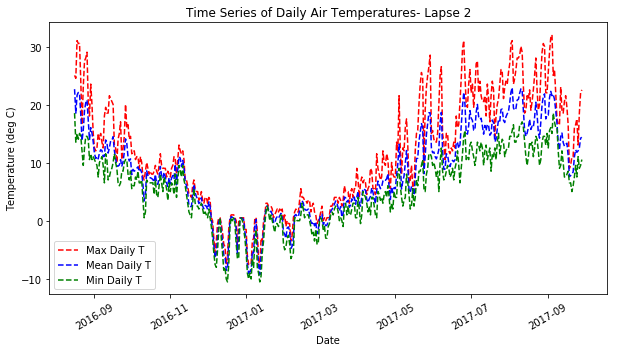

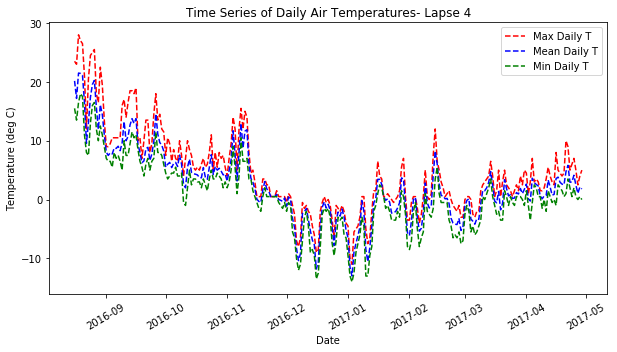

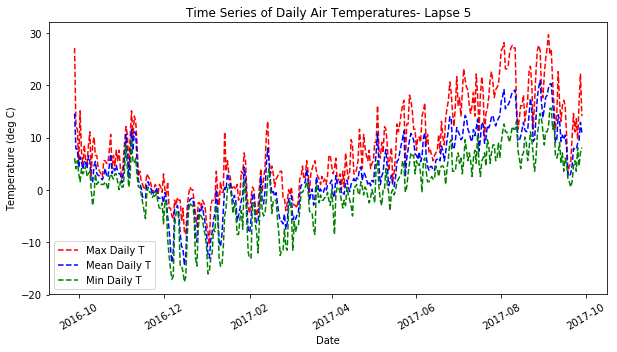

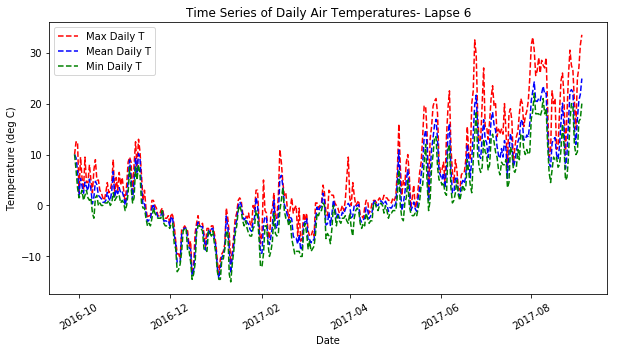

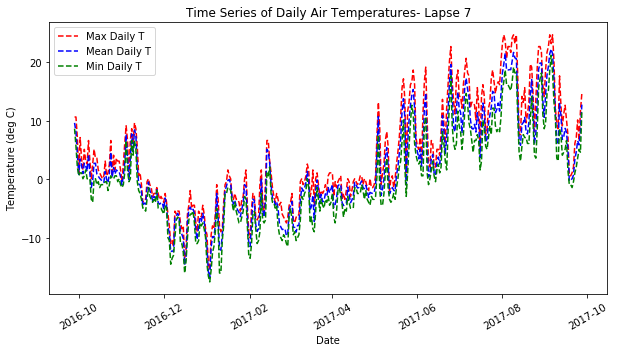

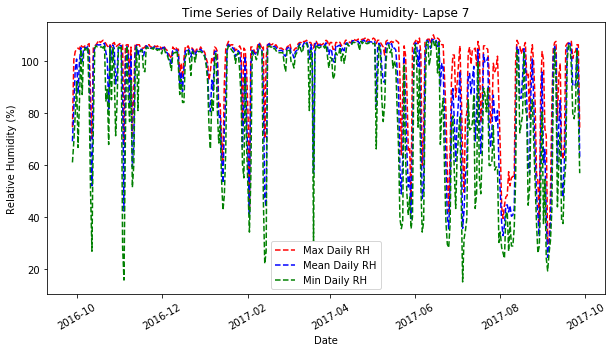

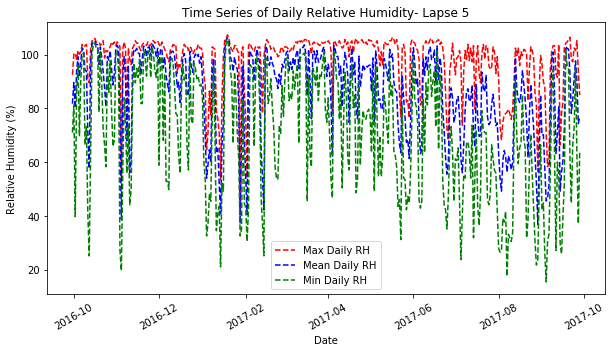

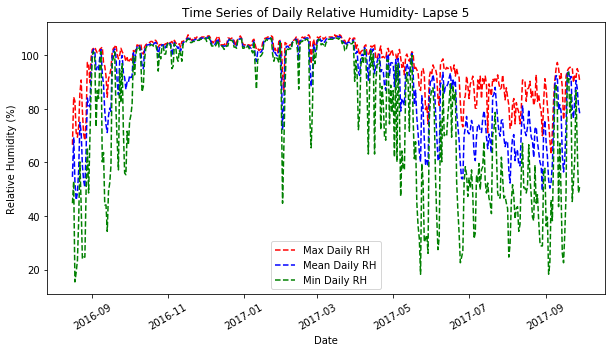

In [82]:
fig4, ax4=plt.subplots(1,1,figsize=(10, 5))
plt.plot(grouped_dates_Lapse1,daily_Tmax_Lapse1,'r--',label='Max Daily T')
plt.plot(grouped_dates_Lapse1,daily_Tmean_Lapse1,'b--',label='Mean Daily T')
plt.plot(grouped_dates_Lapse1,daily_Tmin_Lapse1,'g--',label='Min Daily T')
plt.title('Time Series of Daily Air Temperatures- Lapse 2')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Temperature (deg C)')
plt.legend(loc='best')     
 

fig6, ax6=plt.subplots(1,1,figsize=(10, 5))
plt.plot(grouped_dates_Lapse4,daily_Tmax_Lapse4,'r--',label='Max Daily T')
plt.plot(grouped_dates_Lapse4,daily_Tmean_Lapse4,'b--',label='Mean Daily T')
plt.plot(grouped_dates_Lapse4,daily_Tmin_Lapse4,'g--',label='Min Daily T')
plt.title('Time Series of Daily Air Temperatures- Lapse 4')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Temperature (deg C)')
plt.legend(loc='best')

fig7, ax7=plt.subplots(1,1,figsize=(10, 5))
plt.plot(grouped_dates_Lapse5,daily_Tmax_Lapse5,'r--',label='Max Daily T')
plt.plot(grouped_dates_Lapse5,daily_Tmean_Lapse5,'b--',label='Mean Daily T')
plt.plot(grouped_dates_Lapse5,daily_Tmin_Lapse5,'g--',label='Min Daily T')
plt.title('Time Series of Daily Air Temperatures- Lapse 5')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Temperature (deg C)')
plt.legend(loc='best')

fig9, ax9=plt.subplots(1,1,figsize=(10, 5))
plt.plot(grouped_dates_Lapse6,daily_Tmax_Lapse6,'r--',label='Max Daily T')
plt.plot(grouped_dates_Lapse6,daily_Tmean_Lapse6,'b--',label='Mean Daily T')
plt.plot(grouped_dates_Lapse6,daily_Tmin_Lapse6,'g--',label='Min Daily T')
plt.title('Time Series of Daily Air Temperatures- Lapse 6')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Temperature (deg C)')
plt.legend(loc='best')

fig11, ax11=plt.subplots(1,1,figsize=(10, 5))
plt.plot(grouped_dates_Lapse7,daily_Tmax_Lapse7,'r--',label='Max Daily T')
plt.plot(grouped_dates_Lapse7,daily_Tmean_Lapse7,'b--',label='Mean Daily T')
plt.plot(grouped_dates_Lapse7,daily_Tmin_Lapse7,'g--',label='Min Daily T')
plt.title('Time Series of Daily Air Temperatures- Lapse 7')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Temperature (deg C)')
plt.legend(loc='best')

fig13, ax13=plt.subplots(1,1,figsize=(10, 5))
plt.plot(grouped_dates_Lapse7_RH,daily_Tmax_Lapse7_RH,'r--',label='Max Daily RH')
plt.plot(grouped_dates_Lapse7_RH,daily_Tmean_Lapse7_RH,'b--',label='Mean Daily RH')
plt.plot(grouped_dates_Lapse7_RH,daily_Tmin_Lapse7_RH,'g--',label='Min Daily RH')
plt.title('Time Series of Daily Relative Humidity- Lapse 7')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Relative Humidity (%)')
plt.legend(loc='best')  

fig14, ax14=plt.subplots(1,1,figsize=(10, 5))
plt.plot(grouped_dates_Lapse5_RH,daily_Tmax_Lapse5_RH,'r--',label='Max Daily RH')
plt.plot(grouped_dates_Lapse5_RH,daily_Tmean_Lapse5_RH,'b--',label='Mean Daily RH')
plt.plot(grouped_dates_Lapse5_RH,daily_Tmin_Lapse5_RH,'g--',label='Min Daily RH')
plt.title('Time Series of Daily Relative Humidity- Lapse 5')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Relative Humidity (%)')
plt.legend(loc='best') 

fig15, ax15=plt.subplots(1,1,figsize=(10, 5))
plt.plot(grouped_dates_Lapse1_RH,daily_Tmax_Lapse1_RH,'r--',label='Max Daily RH')
plt.plot(grouped_dates_Lapse1_RH,daily_Tmean_Lapse1_RH,'b--',label='Mean Daily RH')
plt.plot(grouped_dates_Lapse1_RH,daily_Tmin_Lapse1_RH,'g--',label='Min Daily RH')
plt.title('Time Series of Daily Relative Humidity- Lapse 5')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Relative Humidity (%)')
plt.legend(loc='best')    

In [85]:
#Save the daily data  
import pandas as pd
#Lapse1_mean_dailyT = pd.DataFrame({'Time':grouped_dates_Lapse1[:],'AirT_Lapse1_daily_mean':daily_Tmean_Lapse1[:]})
#Lapse1_mean_dailyT.to_csv('Lapse1_data_2017_dailyT.csv',index=False)

#Lapse4_mean_dailyT = pd.DataFrame({'Time':grouped_dates_Lapse4[:],'AirT_Lapse4_daily_mean':daily_Tmean_Lapse4[:]})
#Lapse4_mean_dailyT.to_csv('Lapse4_data_2017_dailyT.csv',index=False)

#Lapse6_mean_dailyT = pd.DataFrame({'Time':grouped_dates_Lapse6[:],'AirT_Lapse6_daily_mean':daily_Tmean_Lapse6[:]})
#Lapse6_mean_dailyT.to_csv('Lapse6_data_2017_dailyT.csv',index=False)

#Lapse5_mean_dailyT = pd.DataFrame({'Time':grouped_dates_Lapse5[:],'AirT_Lapse5_daily_mean':daily_Tmean_Lapse5[:]})
#Lapse5_mean_dailyT.to_csv('Lapse5_data_2017_dailyT.csv',index=False)

#Lapse7_mean_dailyT = pd.DataFrame({'Time':grouped_dates_Lapse7[:],'AirT_Lapse7_daily_mean':daily_Tmean_Lapse7[:]})
#Lapse7_mean_dailyT.to_csv('Lapse7_data_2017_dailyT.csv',index=False)


#Lapse1_mean_dailyRH = pd.DataFrame({'Time':grouped_dates_Lapse1_RH[:],'Lapse1_daily_mean_RH':daily_Tmean_Lapse1_RH[:]})
#Lapse1_mean_dailyRH.to_csv('Lapse1_data_2017_dailyRH.csv',index=False)

#Lapse5_mean_dailyRH = pd.DataFrame({'Time':grouped_dates_Lapse5_RH[:],'Lapse5_daily_mean_RH':daily_Tmean_Lapse5_RH[:]})
#Lapse5_mean_dailyRH.to_csv('Lapse5_data_2017_dailyRH.csv',index=False)

#Lapse7_mean_dailyRH = pd.DataFrame({'Time':grouped_dates_Lapse7_RH[:],'Lapse7_daily_mean_RH':daily_Tmean_Lapse7_RH[:]})
#Lapse7_mean_dailyRH.to_csv('Lapse7_data_2017_dailyRH.csv',index=False)


### Nicoleta - I stopped here!   i.

Calculate lapse rates



In [88]:
print('Beginning Lapse 1', datetime_Lapse1[0])
print('Beginning Lapse 4', datetime_Lapse4[0])
print('Beginning Lapse 5', datetime_Lapse5[0])
print('Beginning Lapse 6', datetime_Lapse6[0])
print('Beginning Lapse 7', datetime_Lapse7[0])

print('End Lapse 1', datetime_Lapse1[-1])
print('End Lapse 4', datetime_Lapse4[-1])
print('End Lapse 5', datetime_Lapse5[-1])
print('End Lapse 6', datetime_Lapse6[-1])
print('End Lapse 6', datetime_Lapse7[-1])


Beginning Lapse 1 2016-08-16 12:00:01
Beginning Lapse 4 2016-08-16 15:02:00
Beginning Lapse 5 2016-09-28 15:00:01
Beginning Lapse 6 2016-09-28 20:00:00
Beginning Lapse 7 2016-09-28 18:01:01
End Lapse 1 2017-09-28 15:00:01
End Lapse 4 2017-04-29 12:02:00
End Lapse 5 2017-09-28 09:00:01
End Lapse 6 2017-09-04 20:00:00
End Lapse 6 2017-09-27 12:01:01


In [89]:
print(datetime_Lapse1[345])
print(grouped_dates_Lapse1[43])
print(datetime_Lapse4[345])
print(grouped_dates_Lapse4[43])
print(datetime_Lapse5[0])
print(grouped_dates_Lapse5[0])
print(datetime_Lapse6[0])
print(grouped_dates_Lapse6[0])
print(datetime_Lapse7[0])
print(grouped_dates_Lapse7[0])

2016-09-28 15:00:01
2016-09-28
2016-09-28 18:02:00
2016-09-28
2016-09-28 15:00:01
2016-09-28
2016-09-28 20:00:00
2016-09-28
2016-09-28 18:01:01
2016-09-28


In [ ]:
print('Beginning Lapse 1 - overlap', grouped_dates_Lapse1[0])
print('Beginning Lapse 4 - overlap', grouped_dates_Lapse4[0])
print('Beginning Lapse 5 - overlap', grouped_dates_Lapse5[0])
print('Beginning Lapse 6 - overlap', grouped_dates_Lapse6[0])
print('Beginning Lapse 7 - overlap', grouped_dates_Lapse7[0])


print('End Lapse 1 - overlap', grouped_dates_Lapse1[-1])
print('End Lapse 4 - overlap', grouped_dates_Lapse4[-1])
print('End Lapse 5 - overlap', grouped_dates_Lapse5[-1])
print('End Lapse 6 - overlap', grouped_dates_Lapse6[-1])
print('End Lapse 7 - overlap', grouped_dates_Lapse7[-1])

In [19]:
print(datetime_Lapse1[345])
print(grouped_dates_Lapse1[43])
print(datetime_Lapse4[345])
print(grouped_dates_Lapse4[43])
print(datetime_Lapse5[0])
print(grouped_dates_Lapse5[0])
print(datetime_Lapse6[0])
print(grouped_dates_Lapse6[0])
print(datetime_Lapse7[0])
print(grouped_dates_Lapse7[0])

2016-09-28 15:00:01
2016-09-28
2016-09-28 18:02:00
2016-09-28
2016-09-28 15:00:01
2016-09-28
2016-09-28 16:00:00
2016-09-28
2016-09-28 15:01:01
2016-09-28


In [21]:
#Here we try to find the time overlap between recordings 
#Lapse 4 has a shorter time series, will be removed from lapse calculations 

ind_Lapse1_start=345 # This is the index of (9/28/16 at ~15:00) in 3-hour time series
ind_Lapse1_daily_start=43 # This is the index of (9/28/16 at ~15:00) in grouped dates.
datetime_Lapse1_adj=datetime_Lapse1[(ind_Lapse1_start):-1:]
temp_Lapse1_adj=temp_Lapse1[(ind_Lapse1_start):-1:]
RH_Lapse1_adj=RH_Lapse1[(ind_Lapse1_start):-1:]

grouped_dates_Lapse1_adj=grouped_dates_Lapse1[(ind_Lapse1_daily_start)::]
daily_Tmean_Lapse1_adj=daily_Tmean_Lapse1[(ind_Lapse1_daily_start)::]

ind_Lapse4_start=345 # This is the index of (9/28/16 at ~15:00) in 3-hour time series
ind_Lapse4_daily_start=43 # This is the index of (12/4/15) in grouped dates.
datetime_Lapse4_adj=datetime_Lapse4[(ind_Lapse4_start):-1:]
temp_Lapse4_adj=temp_Lapse4[(ind_Lapse4_start):-1:]
#RH_Lapse4_adj=RH_Lapse4[(ind_Lapse4_start):-1:]

grouped_dates_Lapse4_adj=grouped_dates_Lapse4[(ind_Lapse4_daily_start)::]
daily_Tmean_Lapse4_adj=daily_Tmean_Lapse4[(ind_Lapse4_daily_start)::]

In [22]:
print(datetime_Lapse1_adj[0])
print(grouped_dates_Lapse1_adj[0])

2016-09-28 15:00:01
2016-09-28


In [ ]:
ind_Lapse1_start=345 # This is the index of (9/28/16 at ~15:00) in 3-hour time series
ind_Lapse1_daily_start=43 # This is the index of (9/28/16 at ~15:00) in grouped dates.
datetime_Lapse1_adj=datetime_Lapse1[(ind_Lapse1_start):-1:]
#temp_Lapse1_adj=temp_Lapse1[(ind_Lapse1_start):-1:]
#RH_Lapse1_adj=RH_Lapse1[(ind_Lapse1_start):-1:]
datetime_Lapse1_adj.size

### Convert elevations to km

In [ ]:
elevations_k = np.array([elev_Lapse1/1000, elev_Lapse4/1000, elev_Lapse5/1000,
                        elev_Lapse6/1000, elev_Lapse7/1000]) 
                    # Convert to km to have consistent lapse  rates units. 

In [ ]:
print(elev_Lapse1)
print(elev_Lapse4)
print(elev_Lapse5)
print(elev_Lapse6)
print(elev_Lapse7)
print(elevations_km)

In [32]:
ann_mean_daily_Tmean_Lapse1=np.nanmean(daily_Tmean_Lapse1)
#ann_mean_daily_Tmean_Lapse4=np.nanmean(daily_Tmean_Lapse4)
ann_mean_daily_Tmean_Lapse5=np.nanmean(daily_Tmean_Lapse5)
ann_mean_daily_Tmean_Lapse6=np.nanmean(daily_Tmean_Lapse6)
ann_mean_daily_Tmean_Lapse7=np.nanmean(daily_Tmean_Lapse7)
ann_mean_daily_Tmean_Lapse1_adj=np.nanmean(daily_Tmean_Lapse1_adj)

In [49]:
print('No values in Lapse 2', daily_Tmean_Lapse1.size) 
#print('No values in Lapse 4', daily_Tmean_Lapse4.size) 
print('No values in Lapse 5', daily_Tmean_Lapse5.size) 
print('No values in Lapse 6', daily_Tmean_Lapse6.size) 
print('No values in Lapse 7', daily_Tmean_Lapse7.size) 
print('No values in Lapse 1_adj', daily_Tmean_Lapse1_adj.size) 
print('No values in Lapse 4_adj', daily_Tmean_Lapse4_adj.size) 

No values in Lapse 2 409
No values in Lapse 5 366
No values in Lapse 6 342
No values in Lapse 7 365
No values in Lapse 1_adj 366
No values in Lapse 4_adj 214


In [51]:
print('No_points Tmean Lapse 1', len(grouped_dates_Lapse1_adj))
print('No_points Tmean Lapse 1 adj', len(daily_Tmean_Lapse1_adj))
grouped_dates_Lapse6[-1]


No_points Tmean Lapse 1 366
No_points Tmean Lapse 1 adj 366


datetime.date(2017, 9, 4)

# Compute Lapse Rates
### Temperature Lapse Rate - Sub-hourly (resolution of raw data)
### - Assuming constant at all elevations

In [23]:
#np.mean(daily_Tmean_LR)
# take out Lapse 4 - the record is too short 
elevations_km = np.array([elev_Lapse1/1000, elev_Lapse5/1000,
                        elev_Lapse6/1000, elev_Lapse7/1000]) 
                    # Convert to km to have consistent lapse  rates units. 

-3.3364878623357814


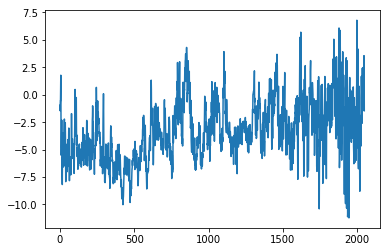

In [52]:
len_shortest = len(temp_Lapse6)

subdaily_LR=np.empty([n_Lapse6,1], dtype=object) # array of daily mean lapse rates
subdaily_b=np.empty([n_Lapse6,1], dtype=object) # array of daily mean y-int
subdaily_r=np.empty([n_Lapse6,1], dtype=object) # array of correlation coefficient
subdaily_p=np.empty([n_Lapse6,1], dtype=object) # array of p-value
subdaily_se=np.empty([n_Lapse6,1], dtype=object) # array of standard error
for i in range(0,len_shortest):
    [subdaily_LR[i], subdaily_b[i], subdaily_r[i], subdaily_p[i],
     subdaily_se[i]] =stats.linregress(elevations_km, 
    [temp_Lapse1_adj[i], temp_Lapse5[i], temp_Lapse6[i], 
     temp_Lapse7[i]])
subdaily_LR_ = list(filter(None, subdaily_LR))     #filter nones
subdaily_LR_ = np.asarray(subdaily_LR_)

subdaily_b = list(filter(None, subdaily_b))     #filter nones
subdaily_b = np.asarray(subdaily_b)

mean_LR=np.mean(subdaily_LR_)
mean_b=np.mean(subdaily_b)


#mean_r=np.mean(subdaily_r)
#mean_p=np.mean(subdaily_p)
#mean_se=np.mean(subdaily_se) 

print(mean_LR)


plt.plot(subdaily_LR_)

In [53]:
# Temperature Lapse Rate - Daily Mean Temperature
# - Assuming constant at all elevations
ndays_Lapse_shortest = len(daily_Tmean_Lapse6)

daily_Tmean_LR=np.empty([ndays_Lapse6-2,1],dtype=object) # array of daily mean lapse rates
daily_Tmean_b=np.empty([ndays_Lapse6-2,1], dtype=object) # array of daily mean y-int
daily_Tmean_r=np.empty([ndays_Lapse6-2,1], dtype=object) # array of correlation coefficient
daily_Tmean_p=np.empty([ndays_Lapse6-2,1], dtype=object) # array of p-value
daily_Tmean_se=np.empty([ndays_Lapse6-2,1], dtype=object) # array of standard error

for i in range(1, ndays_Lapse_shortest-1): # Do not include first and last days since 
   [daily_Tmean_LR[i-1],daily_Tmean_b[i-1],daily_Tmean_r[i-1], 
     daily_Tmean_p[i-1], daily_Tmean_se[i-1]]=stats.linregress (elevations_km,
    [daily_Tmean_Lapse1_adj[i], daily_Tmean_Lapse5[i],
     daily_Tmean_Lapse6[i], daily_Tmean_Lapse7[i]])

daily_Tmean_LR_ = list(filter(None, daily_Tmean_LR))     #filter nones
daily_Tmean_LR_= np.asarray(daily_Tmean_LR_)
ann_mean_LR_daily_Tmean=np.mean(daily_Tmean_LR_)
#ann_mean_b_daily_Tmean=np.mean(daily_Tmean_b)
#ann_mean_r_daily_Tmean=np.mean(daily_Tmean_r)
#ann_mean_p_daily_Tmean=np.mean(daily_Tmean_p)

# Plot Lapse Rates on a single time-step

In [54]:
ann_mean_LR_daily_Tmean

-4.356989327544664

2016-08-29 00:00:01
[-2.8622670145103384]


Text(0.5,1,'Lapse Rate=-4.75 deg C/km, 12/17/15, 2:01 am')

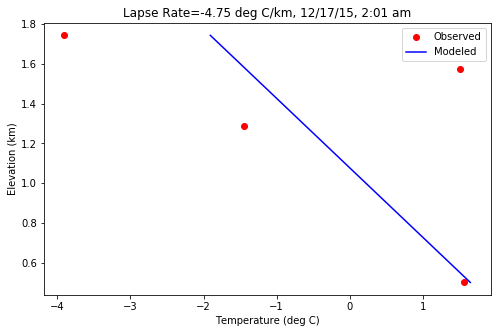

In [55]:
j=100 # input time step of interest
T_plot=[temp_Lapse1_adj[j], temp_Lapse5[j], temp_Lapse6[j],
        temp_Lapse7[j]]
LR_plot=subdaily_LR[j]
b_plot=subdaily_b[j]
print(datetime_Lapse1[j])
print(LR_plot)

fig14=plt.figure(figsize=(8, 5))
plt.plot(T_plot, elevations_km,'ro',label='Observed')
plt.plot(elevations_km*LR_plot+b_plot, elevations_km,'b-',label='Modeled')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Elevation (km)')
plt.legend(loc='best')
plt.title('Lapse Rate=-4.75 deg C/km, 12/17/15, 2:01 am')
# Interesting dates/times:
# j=100 (12/17/15)- closely follows lapse rate of -1.45
# j=1000 (4/7/16)- crazy inversions!


In [67]:
print(grouped_dates_Lapse6[150])
print(grouped_dates_Lapse1_adj[150])
print(grouped_dates_Lapse5[150])
print(grouped_dates_Lapse6[150])

2017-02-25
2017-02-25
2017-02-25
2017-02-25


# Plot lapse rate on a single day

In [ ]:
#daily_Tmean_LR

2017-01-13
[-6.160520598118621]


Text(0.5,1,'Lapse Rate Check for Individual Day')

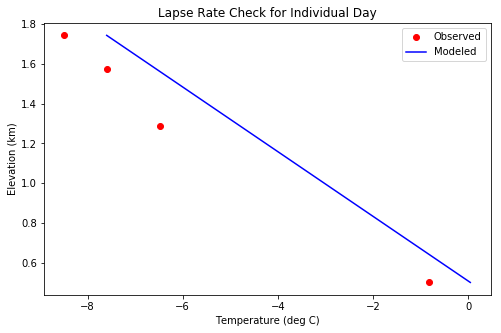

In [68]:
j=150 # input time step of interest
T_plot=[daily_Tmean_Lapse1_adj[j], daily_Tmean_Lapse5[j],
        daily_Tmean_Lapse6[j], daily_Tmean_Lapse7[j]]
LR_plot=daily_Tmean_LR[j]
b_plot=daily_Tmean_b[j]
print(grouped_dates_Lapse1[j])
print(LR_plot)

fig14=plt.figure(figsize=(8, 5))
plt.plot(T_plot, elevations_km,'ro',label='Observed')
plt.plot(elevations_km*LR_plot+b_plot, elevations_km,'b-',label='Modeled')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Elevation (km)')
plt.legend(loc='best')
plt.title('Lapse Rate Check for Individual Day')
# Interesting days:
# j=150 (5/2/16)- huge inversion!


# Plot with annual mean temperatures and lapse rate

Text(0.5,1,'Average Annual Lapse Rate of Daily Mean Temperature = -4.45 deg C/km')

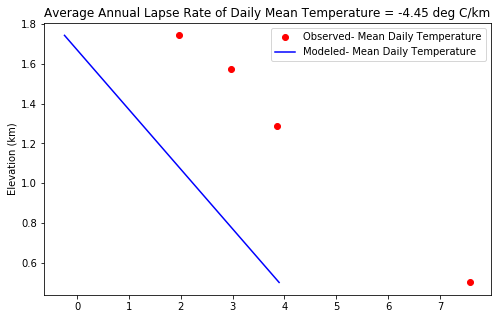

In [69]:
fig15=plt.figure(figsize=(8, 5))
T_plot=[ann_mean_daily_Tmean_Lapse1_adj, 
        ann_mean_daily_Tmean_Lapse5, ann_mean_daily_Tmean_Lapse6,
        ann_mean_daily_Tmean_Lapse7]
LR_plot=mean_LR
b_plot=mean_b

plt.plot(T_plot, elevations_km,'ro',label='Observed- Mean Daily Temperature')
plt.plot(elevations_km*LR_plot+b_plot, elevations_km,'b-',label='Modeled- Mean Daily Temperature')
#plt.xlabel('Temperature (deg C)')
plt.ylabel('Elevation (km)')
plt.legend(loc='best')
plt.title('Average Annual Lapse Rate of Daily Mean Temperature = -4.45 deg C/km')
#%%

# Plot Time Series of Daily Temperature Lapse Rate

Text(0.5,1,'Time Series of Lapse Rate')

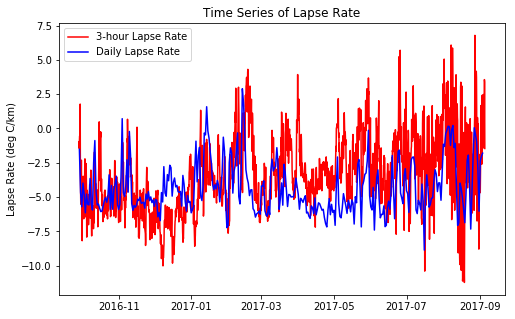

In [70]:
fig16=plt.figure(figsize=(8, 5))
plt.plot(datetime_Lapse6, subdaily_LR,'r',label='3-hour Lapse Rate')
plt.plot(grouped_dates_Lapse6[1:-1], daily_Tmean_LR,'b',label='Daily Lapse Rate')
#plt.xlabel('Date')
plt.ylabel('Lapse Rate (deg C/km)')
plt.legend(loc='best')
plt.title('Time Series of Lapse Rate')


## Nicoleta stop 2

Temperature Lapse Rate - Sub-hourly (resolution of raw data) between elev 2180 and 3465
### - Assuming varies between elevation

In [ ]:
elevations_23_4=np.array([elevations_km[0], elevations_km[2]],dtype='float64')

subdaily_LR_23_4=np.empty([n_Lapse2,1], dtype=object) # array of daily mean lapse rates
subdaily_b_23_4=np.empty([n_Lapse2,1], dtype=object) # array of daily mean y-int
subdaily_r_23_4=np.empty([n_Lapse2,1], dtype=object) # array of correlation coefficient
subdaily_p_23_4=np.empty([n_Lapse2,1], dtype=object) # array of p-value
subdaily_se_23_4=np.empty([n_Lapse2,1], dtype=object) # array of standard error
elevations_23_4=np.array([elevations_km[0], elevations_km[2]],dtype='float64')
for i in range(0,n_Lapse2):
    [subdaily_LR_23_4[i], subdaily_b_23_4[i], subdaily_r_23_4[i], 
    subdaily_p_23_4[i],subdaily_se_23_4[i]] = stats.linregress(elevations_23_4, 
    [temp_Lapse2[i], temp_Lapse4[i]])
mean_LR_23_4=np.mean(subdaily_LR_23_4)
mean_b_23_4=np.mean(subdaily_b_23_4) 
mean_r_23_4=np.mean(subdaily_r_23_4)
mean_p_23_4=np.mean(subdaily_p_23_4) 
mean_se_23_4=np.mean(subdaily_se_23_4) 

In [ ]:
elevations_23_4=np.array([elevations_km[0], elevations_km[2]],dtype='float64')
elevations_23_4

## Temperature Lapse Rate - Sub-hourly (resolution of raw data) between elev 3465 and 5168
### - Assuming varies between elevation

In [ ]:
n_LR_4_6=len(datetime_Lapse4) # only look at days with both have data recorded
subdaily_LR_4_6=np.empty([n_LR_4_6,1], dtype=object) # array of daily mean lapse rates
subdaily_b_4_6=np.empty([n_LR_4_6,1], dtype=object) # array of daily mean y-int
subdaily_r_4_6=np.empty([n_LR_4_6,1], dtype=object) # array of correlation coefficient
subdaily_p_4_6=np.empty([n_LR_4_6,1], dtype=object) # array of p-value
subdaily_se_4_6=np.empty([n_LR_4_6,1], dtype=object) # array of standard error
elevations_4_6=np.array([elevations_km[2], elevations_km[3]])
T_plot_4_6=np.empty([n_LR_4_6,2])
for i in range(0,n_LR_4_6):
    [subdaily_LR_4_6[i], subdaily_b_4_6[i], subdaily_r_4_6[i], 
     subdaily_p_4_6[i],subdaily_se_4_6[i]] =stats.linregress(elevations_4_6, 
    [temp_Lapse4[i], temp_Lapse6[i]])
mean_LR_4_6=np.mean(subdaily_LR_4_6)
mean_b_4_6=np.mean(subdaily_b_4_6) 
mean_r_4_6=np.mean(subdaily_r_4_6)
mean_p_4_6=np.mean(subdaily_p_4_6) 
mean_se_4_6=np.mean(subdaily_se_4_6)

## Temperature Lapse Rate - Sub-hourly (resolution of raw data) between elev 2180 and 3465
### - Assuming varies between elevation

In [ ]:
subdaily_LR_6_7=np.empty([n_Lapse2,1], dtype=object) # array of daily mean lapse rates
subdaily_b_6_7=np.empty([n_Lapse2,1], dtype=object) # array of daily mean y-int
subdaily_r_6_7=np.empty([n_Lapse2,1], dtype=object) # array of correlation coefficient
subdaily_p_6_7=np.empty([n_Lapse2,1], dtype=object) # array of p-value
subdaily_se_6_7=np.empty([n_Lapse2,1], dtype=object) # array of standard error
elevations_6_7=np.array([elevations_km[2], elevations_km[3]])
for i in range(0,n_Lapse2):
    [subdaily_LR_6_7[i], subdaily_b_6_7[i], subdaily_r_6_7[i], 
    subdaily_p_6_7[i],subdaily_se_6_7[i]]=stats.linregress(elevations_6_7,
    [temp_Lapse6[i], temp_Lapse7_adj[i]])
mean_LR_6_7=np.mean(subdaily_LR_6_7)
mean_b_6_7=np.mean(subdaily_b_6_7) 
mean_r_6_7=np.mean(subdaily_r_6_7)
mean_p_6_7=np.mean(subdaily_p_6_7) 
mean_se_6_7=np.mean(subdaily_se_6_7)


In [ ]:
fig14=plt.figure(figsize=(12, 8))
# Plot with annual mean temperatures and lapse rate
T_plot=[np.nanmean(temp_Lapse6), np.nanmean(temp_Lapse7_adj)]
LR_plot=mean_LR_6_7
b_plot=mean_b_6_7
plt.plot(T_plot, elevations_6_7,'go',label='Observed, Average Temp, 1575m-1743m')
plt.plot(elevations_6_7*LR_plot+b_plot, elevations_6_7,'g-', label='Modeled, 1575m-1743m, LR=-7.17 C/km')

T_plot=[np.nanmean(temp_Lapse4), np.nanmean(temp_Lapse6)]
LR_plot=mean_LR_4_6
b_plot=mean_b_4_6
plt.plot(T_plot, elevations_4_6,'ko',label='Observed, Average Temp, 1056m-1575m')
plt.plot(elevations_4_6*LR_plot+b_plot, elevations_4_6,'k-',
         label='Modeled, 1287m-1575m, LR=-5.46 C/km')
         
T_plot=[np.nanmean(temp_Lapse2), #np.nanmean(temp_Lapse3),
        np.nanmean(temp_Lapse4)]
LR_plot=mean_LR_23_4
b_plot=mean_b_23_4
plt.plot(T_plot, elevations_23_4,'ro',label='Observed, Average Temp, 664m -1056m')
plt.plot(elevations_23_4*LR_plot+b_plot, elevations_23_4,'r-',
         label='Modeled, 664m -1056m, LR=-2.25 C/km')
       
T_plot=[ann_mean_daily_Tmean_Lapse2,  #ann_mean_daily_Tmean_Lapse3, 
ann_mean_daily_Tmean_Lapse4, ann_mean_daily_Tmean_Lapse6, 
ann_mean_daily_Tmean_Lapse7_adj]
LR_plot=ann_mean_LR_daily_Tmean
b_plot=ann_mean_b_daily_Tmean
plt.plot(elevations_km*LR_plot+b_plot, elevations_km,'y-',label='Modeled, All Elevations, LR=-4.45 C/km')
